## Main code

In [1]:
import subprocess
import os
from tqdm import tqdm
import pandas as pd
from numpy import genfromtxt
import scipy.stats as ss

with open('data/pathways.csv') as in_f:
    cur_gene_set = in_f.readlines()[0]

counter = {15:{True:0, False:0},
           0:{True:0, False:0},}
lengthes = {15:[],
         0:[]}

# variables
for i in tqdm(range(0, 50)):
    for k in [0, 15]:
        # best constants
        K=30
        m_beta=0.5
        sd_beta=0.1
        gen_var=0.5
        h2s=0.5

        phenos_id = f'ph_{k}_{i}'
        sim_id=f"K{K}_m{m_beta}_sd{sd_beta}_gv{gen_var}_h2s{h2s}"
        out_dir = f"data/lsea_{phenos_id}_{sim_id}"
        pval = 0.00000000729730
        result_file = os.path.join(out_dir, f"universe_result_{pval}.tsv")
        try:
            data = pd.read_csv(result_file, sep='\t')
        except FileNotFoundError:
            print(f'El problemo: {result_file}')
            continue
        lengthes[k].append(data.shape[0])
        counter[k][cur_gene_set in set(data.Gene_set)]+=1
contigency_data = pd.DataFrame(counter).rename(columns={0: 'k=0', 15: 'k=15'}, index={False: 'Причинный набор НЕ найден', True: 'Причинный набор найден'}).T  
print(contigency_data)
print(f'Pval Difference (chi2): {ss.chi2_contingency(contigency_data.to_numpy())[1]}')

100%|█████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 339.56it/s]

      Причинный набор найден  Причинный набор НЕ найден
k=15                      50                          0
k=0                        3                         47
Pval Difference (chi2): 3.066561764717545e-20


## Modifications

/tmp/ipykernel_14646/1321446209.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(lengthes[15], label='K=30, k=15', palette='muted', alpha=0.7, binwidth=1, edgecolor='black')
/tmp/ipykernel_14646/1321446209.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(lengthes[0], label='K=30, k=0', palette='muted',alpha=0.7, binwidth=1, edgecolor='black')


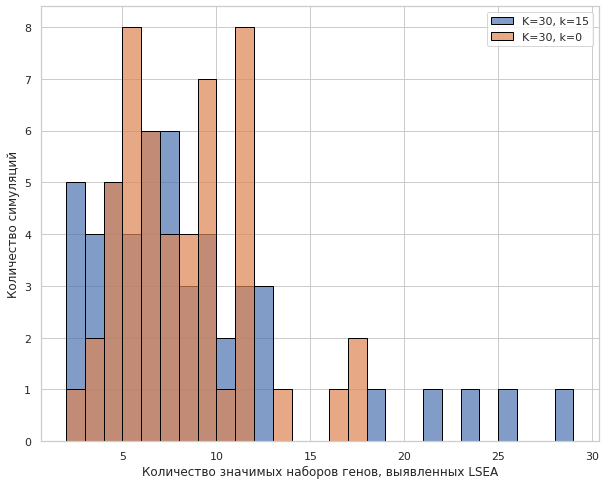

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")

sns.histplot(lengthes[15], label='K=30, k=15', palette='muted', alpha=0.7, binwidth=1, edgecolor='black')
sns.histplot(lengthes[0], label='K=30, k=0', palette='muted',alpha=0.7, binwidth=1, edgecolor='black')
plt.legend()
plt.xlabel("Количество значимых наборов генов, выявленных LSEA")
plt.ylabel("Количество симуляций")
plt.show()

In [3]:
import numpy as np
import numpy as np

def compute_histogram_array(data, x_min, x_max):
    histogram, bin_edges = np.histogram(data, bins=np.arange(x_min, x_max))
    return histogram

# Example usage:
# data = np.array([1, 2, 2, 4, 5, 15, 20, 25, 30, 31, 35])
# histogram_array = compute_histogram_array(data)
# print(histogram_array)


k15 = np.array(lengthes[15])
k0 = np.array(lengthes[0])

k_min = min(k15.min(), k0.min())
k_max = max(k15.max(), k0.max())+2
hist0_ = compute_histogram_array(k0, k_min, k_max)
hist15_ = compute_histogram_array(k15, k_min, k_max)

hist0, hist15 = [], []

for x0, x15 in zip(hist0_, hist15_):
    if x0 == 0 and x15 == 0:
        continue
    hist0.append(x0)
    hist15.append(x15)

hists = np.array([list(hist15), list(hist0)])
print(f'Pval Difference (chi2): {ss.chi2_contingency(hists)[1]}')

Pval Difference (chi2): 0.41469388994665224
